
**************How to visualise XGBoost feature importance in Python***************

GridSearch(cv_folds=3,
           model=XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=300, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=7,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1),
           num_threads=4, parallelize=True,
           param_grid={'n_estimators': [50, 100, 300, 500]}, seed=0)

XGBClassifier: 
Feature ranking:
1. feature 40 (0.109476)
2. feature 8 (0.108171)
3. feature 60

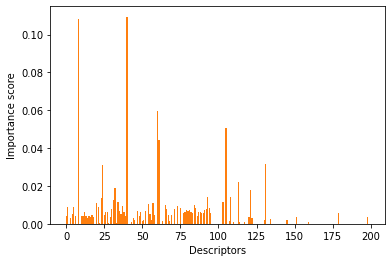

In [3]:
from hypopt import GridSearch
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
def getImportantFeatures():
    print()
    print(format('How to visualise XGBoost feature importance in Python','*^82'))
    
    dataset_train = np.load('numpy_files/b_g_labels_train_molecule_descriptors.npy')
    X_train = dataset_train[:, :-1]
    y_train = dataset_train[:, -1]

    dataset_test = np.load('numpy_files/b_g_labels_test_molecule_descriptors.npy')
    X_test = dataset_test[:, :-1]
    y_test = dataset_test[:, -1]

    clf = XGBClassifier(random_state = 7)
    params = {'n_estimators': [50,100,300,500]}
    mdl = GridSearch(model = clf, param_grid = params)
    mdl.fit(X_train, y_train)
    print(); print(mdl)

    expected_y  = y_test
    predicted_y = mdl.predict(X_test)
    
    print(); print('XGBClassifier: ')
    importances = mdl.best_estimator_.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    out = open('features_csv_plots/biasnet_RDKit_important_Descriptors.csv', 'w')
    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        out.write("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        out.write("\n")
    out.close()
    
    plt.bar(range(len(mdl.best_estimator_.feature_importances_)), mdl.best_estimator_.feature_importances_, color = 'tab:orange')
    plt.xlabel('Descriptors')
    plt.ylabel('Importance score')
    # plt.title('--')
    plt.savefig('features_csv_plots/biasnet_RDKit_important_Descriptors', dpi=300)

getImportantFeatures()


**************How to visualise XGBoost feature importance in Python***************

GridSearch(cv_folds=3,
           model=XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=300, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=7,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1),
           num_threads=4, parallelize=True,
           param_grid={'n_estimators': [50, 100, 300, 500]}, seed=0)

XGBClassifier: 

              precision    recall  f1-score   support

         0.0       0.90

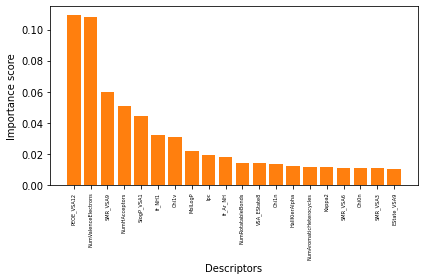

In [11]:
from hypopt import GridSearch
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem, Descriptors

def getImportantFeatures():
    print()
    print(format('How to visualise XGBoost feature importance in Python','*^82'))
    
    dataset_train = np.load('numpy_files/b_g_labels_train_molecule_descriptors.npy')
    X_train = dataset_train[:, :-1]
    y_train = dataset_train[:, -1]

    dataset_test = np.load('numpy_files/b_g_labels_test_molecule_descriptors.npy')
    X_test = dataset_test[:, :-1]
    y_test = dataset_test[:, -1]

    clf = XGBClassifier(random_state = 7)
    params = {'n_estimators': [50,100,300,500]}
    mdl = GridSearch(model = clf, param_grid = params)
    mdl.fit(X_train, y_train)
    print(); print(mdl)
    
    expected_y  = y_test
    predicted_y = mdl.predict(X_test)

    # summarize the fit of the model
    print(); print('XGBClassifier: ')
    print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    print(type(mdl.best_estimator_.feature_importances_))
    important_feat_list = mdl.best_estimator_.feature_importances_
    important_feat_list = np.sort(important_feat_list)
    important_feat_list = important_feat_list[::-1]
    important_feat_list_20 = important_feat_list[:20]
    
    important_feat_list = mdl.best_estimator_.feature_importances_.tolist()
    sorted_descending_important_features = sorted(important_feat_list, reverse=True)
    index_of_soretd_descending_importance_features = np.argsort(important_feat_list)[::-1]
    
    sorted_index_top_20 = index_of_soretd_descending_importance_features.tolist()
    sorted_index_top_20 = sorted_index_top_20[:20]

    descriptors = [x[0] for x in Descriptors._descList]

    top_20_des = []
    
    for i in sorted_index_top_20:
        top_20_des.append(descriptors[i])
    print('len of ', len(top_20_des))
    
    plt.bar(top_20_des, important_feat_list_20, color = 'tab:orange')
    plt.xticks(top_20_des, rotation=90, fontsize=5)
    plt.xlabel('Descriptors')
    plt.ylabel('Importance score')
    # plt.title('-')
    plt.tight_layout()
    plt.savefig('features_csv_plots/biasnet_RDKit_top20_important_Descriptors', dpi=300)
getImportantFeatures()
